In [2]:
import librosa

# Charger le fichier audio
audio_file = 'Lauv - Love Somebody [Official Audio].wav'  # Remplace avec le chemin de ton fichier
audio, sr = librosa.load(audio_file)

print(f"Taux d'échantillonnage : {sr}")
print(f"Durée du fichier audio : {librosa.get_duration(y=audio, sr=sr)} secondes")



Taux d'échantillonnage : 22050
Durée du fichier audio : 142.8 secondes


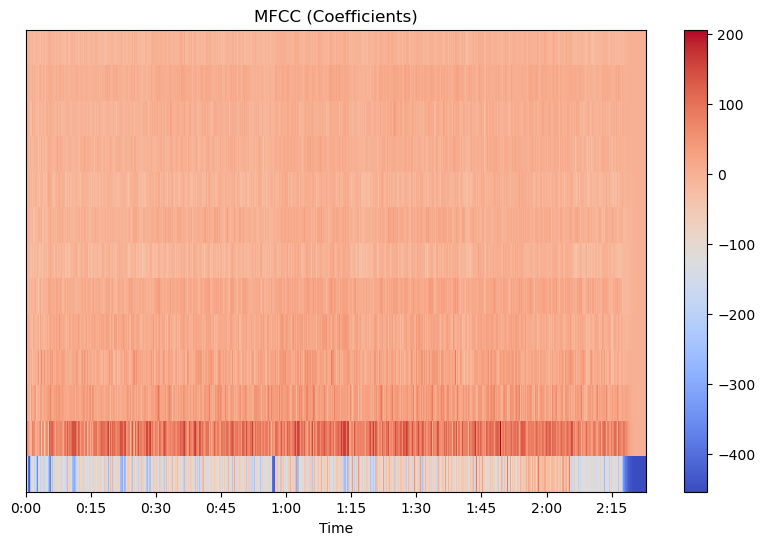

In [3]:
import librosa.display
import matplotlib.pyplot as plt

# Calcul des MFCC
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # 13 MFCC coefficients
mfcc = mfcc.T  # Transposer pour avoir les coefficients sur les colonnes

# Afficher les MFCC
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc.T, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC (Coefficients)')
plt.show()



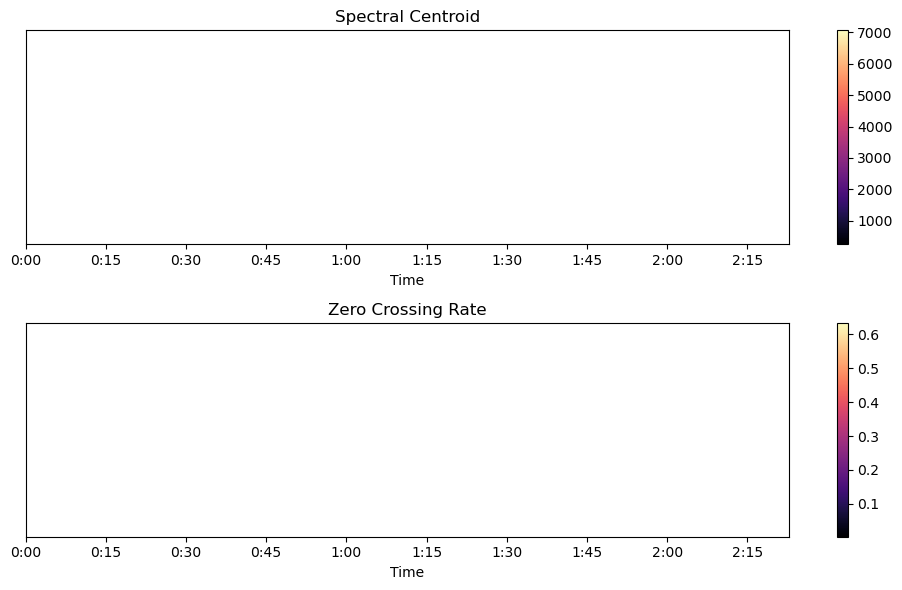

In [4]:
# Calcul du Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)

# Calcul du Zero-Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y=audio)

# Afficher les résultats
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(spectral_centroid, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Spectral Centroid')

plt.subplot(2, 1, 2)
librosa.display.specshow(zcr, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Zero Crossing Rate')

plt.tight_layout()
plt.show()


In [5]:
# Calcul du Spectral Flux
spectral_flux = librosa.feature.spectral_flux(y=audio)

# Afficher le Spectral Flux
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectral_flux, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Spectral Flux')
plt.show()


AttributeError: No librosa.feature attribute spectral_flux

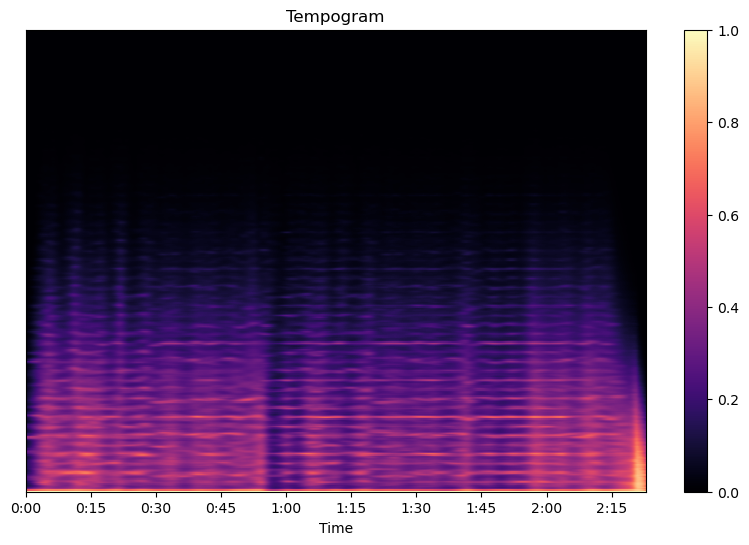

In [6]:
# Calcul du Tempogram
tempogram = librosa.feature.tempogram(y=audio, sr=sr)

# Afficher le Tempogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(tempogram, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Tempogram')
plt.show()


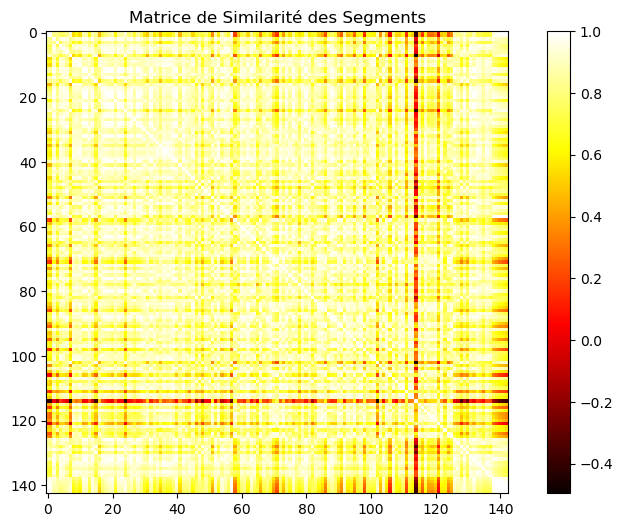

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Découper l'audio en segments de 1 seconde
segment_duration = sr  # 1 seconde
segments = [audio[i:i+segment_duration] for i in range(0, len(audio), segment_duration)]

# Calculer les MFCC pour chaque segment
mfcc_segments = [librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13) for segment in segments]

# Calculer la similarité des segments
similarity_matrix = np.zeros((len(mfcc_segments), len(mfcc_segments)))

for i in range(len(mfcc_segments)):
    for j in range(len(mfcc_segments)):
        similarity_matrix[i, j] = cosine_similarity(mfcc_segments[i].T, mfcc_segments[j].T)[0, 0]

# Afficher la matrice de similarité
plt.figure(figsize=(10, 6))
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Matrice de Similarité des Segments')
plt.show()


In [8]:
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN sur la matrice de similarité
clustering = DBSCAN(eps=0.5, min_samples=3, metric='precomputed').fit(1 - similarity_matrix)

# Obtenir les étiquettes de cluster
labels = clustering.labels_

# Afficher les résultats
print(f"Étiquettes de cluster : {labels}")


ValueError: Negative values in data passed to precomputed distance matrix.

In [9]:
# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, c=labels, cmap='viridis', marker='o')
plt.xlabel('Segments')
plt.ylabel('Cluster ID')
plt.title('Clustering des segments audio')
plt.show()


NameError: name 'labels' is not defined

<Figure size 1000x600 with 0 Axes>

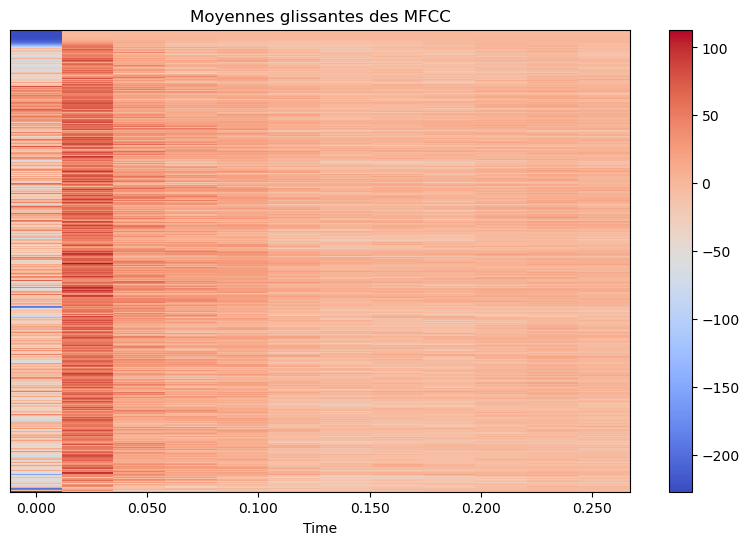

In [10]:
import numpy as np

# Fonction pour calculer les moyennes des MFCC sur des fenêtres glissantes
def sliding_window_mean(mfcc, window_size=2, hop_size=1):
    num_frames = mfcc.shape[1]
    window_means = []
    
    for i in range(0, num_frames - window_size + 1, hop_size):
        window = mfcc[:, i:i + window_size]
        window_mean = np.mean(window, axis=1)  # Moyenne sur la fenêtre
        window_means.append(window_mean)
    
    return np.array(window_means).T  # Transposer pour obtenir la forme correcte

# Calculer les moyennes des MFCC sur des fenêtres glissantes
window_size = 2  # 2 secondes
hop_size = 1     # Avancer d'une seconde à chaque fois
mfcc_window_means = sliding_window_mean(mfcc, window_size, hop_size)

# Visualiser les moyennes des MFCC
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_window_means, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Moyennes glissantes des MFCC')
plt.show()


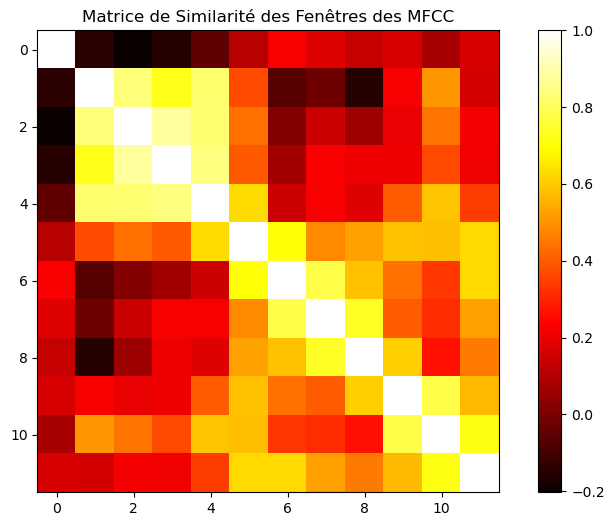

In [11]:
# Calculer la similarité des moyennes des MFCC (similaire à ce qu'on a fait avant)
similarity_window = cosine_similarity(mfcc_window_means.T)

# Afficher la matrice de similarité des fenêtres
plt.figure(figsize=(10, 6))
plt.imshow(similarity_window, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Matrice de Similarité des Fenêtres des MFCC')
plt.show()
